In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=10c7c7ad9633cc12a5ffa92fe7cab9bac21103761eab3ef5310927abd706e3cb
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

from tensorflow import keras
from sklearn import svm, metrics

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.3.0


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 20.6 s


In [ ]:
#provide your url
DATA_PATH= 'drive/My Drive/PATH/'

time: 1.22 ms


In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

time: 3.93 s


In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  20000
Length of y:  20000
time: 1.69 ms


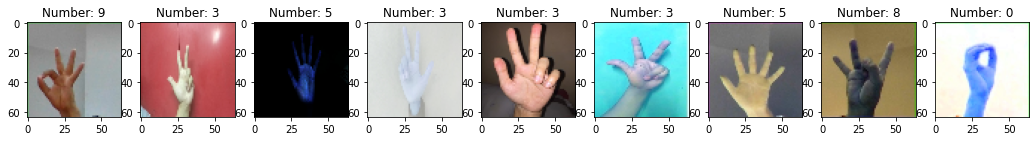

time: 979 ms


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[:9], y[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
x.shape

(20000, 64, 64, 3)

time: 2.7 ms


In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

time: 75.2 ms


In [ ]:
x[0]

In [ ]:
y.shape

(20000,)

time: 1.77 ms


In [ ]:
x=x/255.0

time: 1.02 s


In [ ]:
x[0]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, stratify=y)

time: 755 ms


In [ ]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)

xtrain shape:  (16000, 64, 64, 3)
xtest shape:  (4000, 64, 64, 3)
time: 1.52 ms


In [ ]:
zero=[]
for index, (image, label) in enumerate(zip(xtest, ytest)):
  if label ==5:
    zero.append(image)
len(zero)

400

time: 10.5 ms


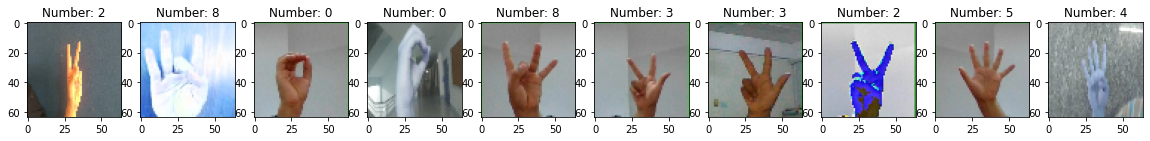

time: 1.15 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtrain[900:910], ytrain[900:910])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
xtrain.shape

(16000, 64, 64, 3)

time: 3.27 ms


In [ ]:
xtrain[0]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3).fit(np.reshape(xtrain, (xtrain.shape[0], -1)), ytrain)

time: 42.4 s


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(np.reshape(xtest, (xtest.shape[0], -1)))

time: 14min 48s


In [ ]:
from sklearn.metrics import accuracy_score
# calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.76875
time: 6.51 ms


In [ ]:
print("Classification report for classifier %s:\n%s\n"%(clf, metrics.classification_report(ytest, y_pred)))


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       400
           1       0.62      0.86      0.72       400
           2       0.67      0.76      0.71       400
           3       0.75      0.78      0.76       400
           4       0.73      0.70      0.72       400
           5       0.85      0.76      0.80       400
           6       0.87      0.73      0.79       400
           7       0.86      0.73      0.79       400
           8       0.85      0.73      0.79       400
           9       0.93      0.76      0.83       400

    accuracy                           0.77      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.78      0.77      0.77      4000


time: 21.2 ms


In [ ]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(ytest, y_pred))

Confusion matrix:
[[354  12  10   1   9   2   3   7   2   0]
 [ 15 345  22   6   5   2   3   1   0   1]
 [ 29  34 302  15   3   4   4   2   7   0]
 [ 10  34  16 313   9   6   1   1   7   3]
 [ 24  20  27  18 279  11   2   3   9   7]
 [ 13  18   4  20  21 305   6   7   4   2]
 [ 13  36  19  11  15   4 293   4   3   2]
 [ 14  24  14   7  15   9  12 291  13   1]
 [ 10  17  25  11  12   7   8  12 291   7]
 [ 15  14  10  17  12  10   6   9   5 302]]
time: 18.3 ms


In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  925
Total number of correctly classified class:  3075
Total number testing data:  4000
time: 17.3 ms


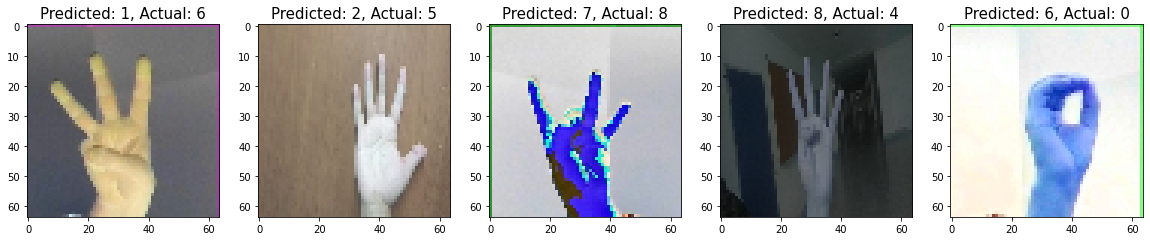

time: 610 ms


In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(xtest[badIndex]))
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], ytest[badIndex]), fontsize = 15)

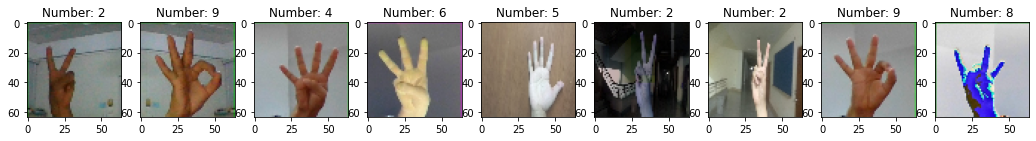

time: 927 ms


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

time: 33.1 ms


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[380  10   9   2  12   1   1   4   1   1]
 [ 16 368  13  14   1   2   6   1   1   2]
 [ 24  37 286  12   4   3  11   4   4   2]
 [ 11  39   9 309   4   6   3   1   1   1]
 [ 25  19  14  18 294   7  10   3   5   3]
 [  9  13  12  19  20 303   3   5  11   3]
 [  8  26  19  18   9   5 316   6   2   1]
 [  9  19  11  10  10   6  13 289  16   1]
 [ 12  18  20  14  14  11   5   9 295   4]
 [  6  10   8  11   8   5   4  16   6 318]]
time: 9.45 ms


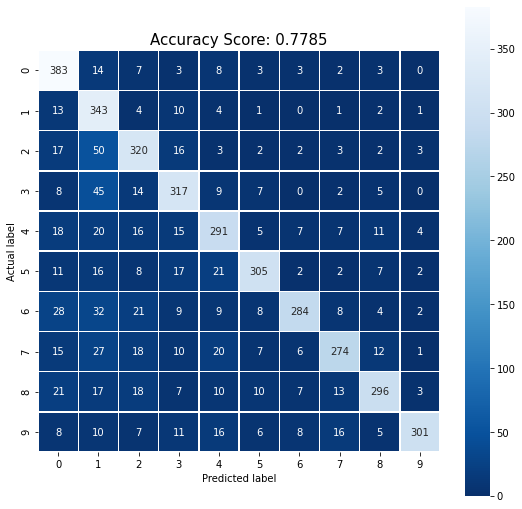

time: 572 ms


In [ ]:
plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(cm, annot=True, fmt="1", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);